In [1]:
import scanpy as sc

In [2]:
import scvi

Global seed set to 0


In [3]:
scvi.settings.seed = 0

Global seed set to 0


In [4]:
adata=sc.read('/lustre/scratch126/cellgen/team298/ab72/CTCL/objects/8_CTCL+PRJ+HRA+flex_raw.h5ad')

In [5]:
adata.layers['raw_counts']=adata.X.copy()

In [6]:
sc.pp.highly_variable_genes(
    adata,
    flavor="seurat_v3",
    n_top_genes=4000,
    layer="raw_counts",
    batch_key="donor",
    span=1,
    subset=True,
)

In [8]:
scvi.model.SCVI.setup_anndata(adata, layer="raw_counts", batch_key='donor', categorical_covariate_keys=['study','tech'])

In [9]:
model = scvi.model.SCVI(adata, n_hidden=100,  n_layers=1, n_latent=5, gene_likelihood="zinb")

In [10]:
model.train()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA H100 80GB HBM3') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 19/19: 100%|██████████| 19/19 [04:45<00:00, 14.97s/it, loss=940, v_num=1]

`Trainer.fit` stopped: `max_epochs=19` reached.


Epoch 19/19: 100%|██████████| 19/19 [04:45<00:00, 15.01s/it, loss=940, v_num=1]


In [11]:
SCVI_LATENT_KEY = "X_scVI"
adata.obsm[SCVI_LATENT_KEY] = model.get_latent_representation()

In [12]:
adata

AnnData object with n_obs × n_vars = 419579 × 4000
    obs: 'batch', 'n_counts', 'n_genes', 'percent_mito', 'study', 'donor', 'tech', 'cell_type', '_scvi_batch', '_scvi_labels'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'hvg', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: '_scvi_extra_categorical_covs', 'X_scVI'
    layers: 'raw_counts'

In [13]:
sc.pp.neighbors(adata, use_rep=SCVI_LATENT_KEY)

In [14]:
SCVI_MDE_KEY = "X_scVI_MDE"
adata.obsm[SCVI_MDE_KEY] = scvi.model.utils.mde(adata.obsm[SCVI_LATENT_KEY])

/nfs/team298/ab72/miniconda3/envs/scvi3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


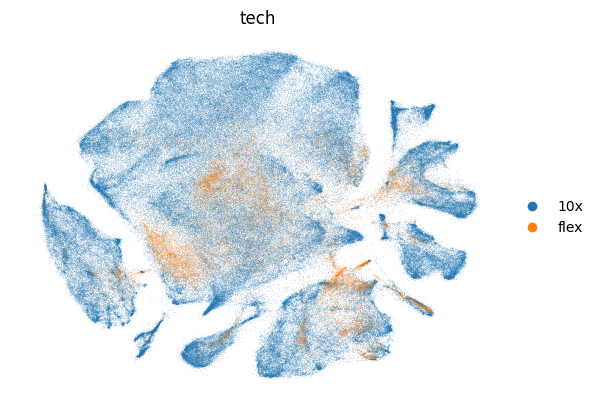

In [15]:
sc.pl.embedding(
    adata,
    basis=SCVI_MDE_KEY,
    color=["tech"],
    frameon=False,
    ncols=1,
)

In [23]:
model.save('/lustre/scratch126/cellgen/team298/ab72/CTCL/allctcl_m1/', save_anndata= True )

In [16]:
adata2=sc.read('/lustre/scratch126/cellgen/team298/ab72/CTCL/objects/8_CTCL+PRJ+HRA+flex_raw.h5ad')

In [18]:
adata2.obsm=adata.obsm
adata2.uns=adata.uns
adata2.obsp=adata.obsp

In [21]:
adata2.write_h5ad('/lustre/scratch126/cellgen/team298/ab72/CTCL/objects/8_CTCL+PRJ+HRA+flex_4k_5dim_100hidd_raw_flex_corrected.h5ad')

In [33]:
adata2.var

Empty DataFrame
Columns: []
Index: [SAMD11, NOC2L, KLHL17, PLEKHN1, HES4, ISG15, AGRN, RNF223, C1orf159, TTLL10, TNFRSF18, TNFRSF4, SDF4, B3GALT6, C1QTNF12, UBE2J2, SCNN1D, ACAP3, PUSL1, INTS11, CPTP, TAS1R3, DVL1, MXRA8, AURKAIP1, CCNL2, ANKRD65, VWA1, ATAD3C, ATAD3B, ATAD3A, TMEM240, SSU72, FNDC10, MIB2, MMP23B, CDK11B, CDK11A, NADK, GNB1, CALML6, TMEM52, CFAP74, GABRD, PRKCZ, FAAP20, SKI, RER1, PEX10, PLCH2, PANK4, HES5, TNFRSF14, PRXL2B, MMEL1, PRDM16, ARHGEF16, MEGF6, TPRG1L, WRAP73, TP73, SMIM1, LRRC47, CEP104, DFFB, C1orf174, AJAP1, NPHP4, KCNAB2, CHD5, RNF207, ICMT, GPR153, ACOT7, HES2, ESPN, TNFRSF25, PLEKHG5, NOL9, TAS1R1, ZBTB48, KLHL21, PHF13, THAP3, DNAJC11, CAMTA1, VAMP3, PER3, UTS2, TNFRSF9, ERRFI1, SLC45A1, RERE, ENO1, CA6, SLC2A7, SLC2A5, GPR157, H6PD, SPSB1, ...]

[15790 rows x 0 columns]

In [26]:
sc.tl.leiden(adata, key_added='groups1', resolution=1)

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


/nfs/team298/ab72/miniconda3/envs/scvi3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


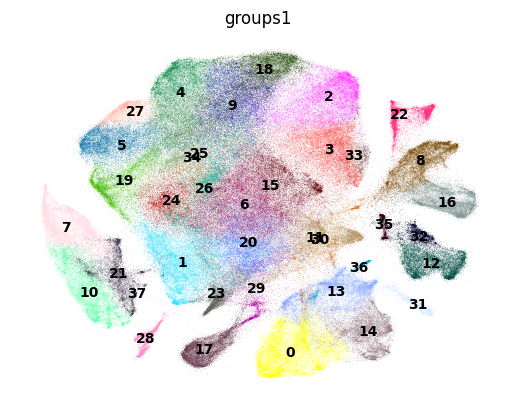

In [34]:
sc.pl.embedding(
    adata2,
    basis=SCVI_MDE_KEY,
    color=["groups1"],
    frameon=False,
    ncols=1,legend_loc='on data'
)

/nfs/team298/ab72/miniconda3/envs/scvi3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


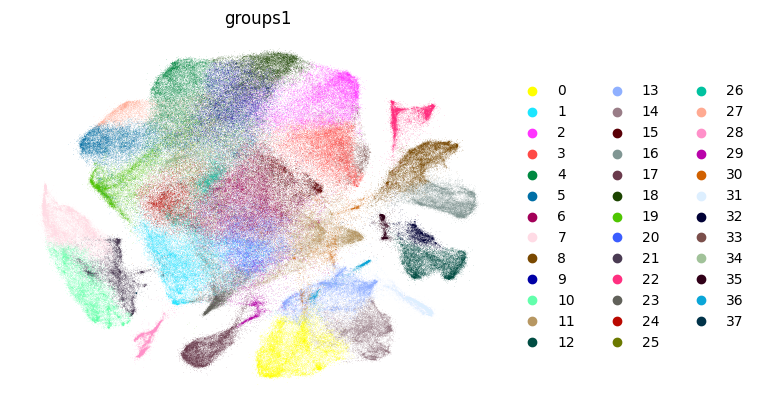

In [39]:
sc.pl.embedding(
    adata2,
    basis=SCVI_MDE_KEY,
    color=["groups1"],
    frameon=False,
    ncols=1
)

In [28]:
adata2.obs['groups1']=adata.obs['groups1']

In [30]:
sc.pp.normalize_total(adata2, target_sum=1e4)
sc.pp.log1p(adata2)

In [36]:
adata2.write_h5ad('/lustre/scratch126/cellgen/team298/ab72/CTCL/objects/8_CTCL+PRJ+HRA+flex_4k_5dim_100hidd_raw_flex_corrected_leiden.h5ad')

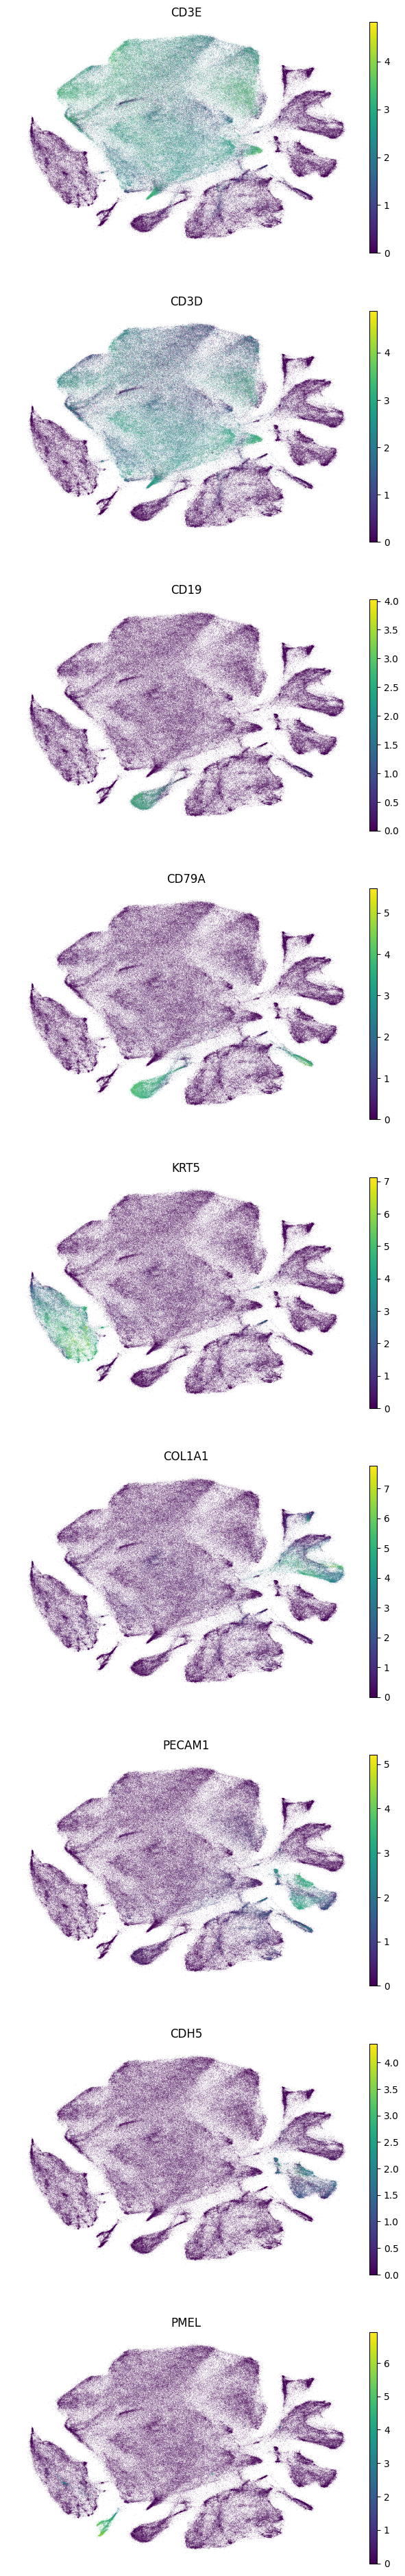

In [35]:
sc.pl.embedding(
    adata2,
    basis=SCVI_MDE_KEY,
    color=["CD3E", "CD3D", "CD19", "CD79A" ,"KRT5", "COL1A1", "PECAM1", "CDH5", "PMEL"],
    frameon=False,
    ncols=1,
)

In [15]:
#adata.write_h5ad('/lustre/scratch126/cellgen/team298/ab72/CTCL/objects/8_CTCL+PRJ+HRA+flex_4k_5dim_100hidd_reproduce.h5ad')

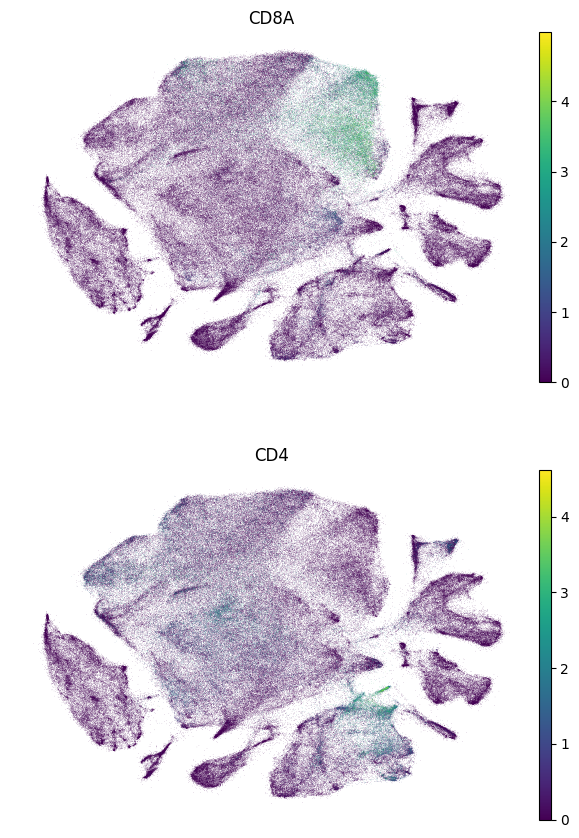

In [49]:
sc.pl.embedding(
    adata2,
    basis=SCVI_MDE_KEY,
    color=["CD8A", "CD4"],
    frameon=False,
    ncols=1,
)

In [2]:
import scanpy as sc
adata2=sc.read('/lustre/scratch126/cellgen/team298/ab72/CTCL/objects/8_CTCL+PRJ+HRA+flex_4k_5dim_100hidd_raw_flex_corrected_leiden_broad_ct.h5ad')

In [3]:
adata2.obs['groups1']=adata2.obs['groups1'].astype(str)
adata2.obs['groups']="group_" + adata2.obs['groups1']

In [38]:
adata2.obs.value_counts()

batch            n_counts  n_genes  percent_mito  study   donor            tech  cell_type     groups1  groups  
24               1073.0    425      0.016775      8_CTCL  CTCL8            10x   plasma_CD79A  31       group_31    2
13               1078.0    510      0.000000      HRA     MF28             10x   T-cells       29       group_29    2
                 1228.0    612      0.000000      HRA     MF28             10x   T-cells       29       group_29    2
23               1498.0    580      0.018024      8_CTCL  CTCL8            10x   T-cells       2        group_2     2
17               2585.0    1151     0.025145      8_CTCL  CTCL7            10x   T-cells       9        group_9     2
                                                                                                                   ..
12               1249.0    566      0.022418      8_CTCL  CTCL6            10x   T-cells       9        group_9     1
                 1248.0    717      0.057692      8_CTCL  CTC

In [6]:
old_to_new = dict(
    group_2='T-cells',
    group_1='T-cells',
    group_3='T-cells',
    group_4='T-cells',
    group_5='T-cells',
    group_6='T-cells',
    group_9='T-cells',
    group_11='T-cells',
    group_15='T-cells',
    group_18='T-cells',
    group_19='T-cells',
    group_20='T-cells',
    group_23='T-cells',
    group_24='T-cells',
    group_25='T-cells',
    group_26='T-cells',
    group_27='T-cells',
    group_29='T-cells',
    group_30='T-cells',
    group_34='T-cells',
    group_33='NK',
    group_28='Melanocytes',
    group_17='B-cells_CD19+CD79A',
    group_22='pericytes',
    group_8='fibroblasts',
    group_16='fibroblasts',
    group_0='APC',
    group_13='APC',
    group_14='APC',
    group_36='APC',
    group_7='Keratinocytes',
    group_10='Keratinocytes',
    group_21='Keratinocytes',
    group_37='Keratinocytes',
    group_12= 'VE',
    group_32= 'VE',
    group_35= 'LE',
    group_31= 'Plasma_cells',
    
    
)
adata2.obs['broad_ct'] = (
    adata2.obs['groups']
    .map(old_to_new)
    .astype('category')
)

/nfs/team298/ab72/miniconda3/envs/scvi3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


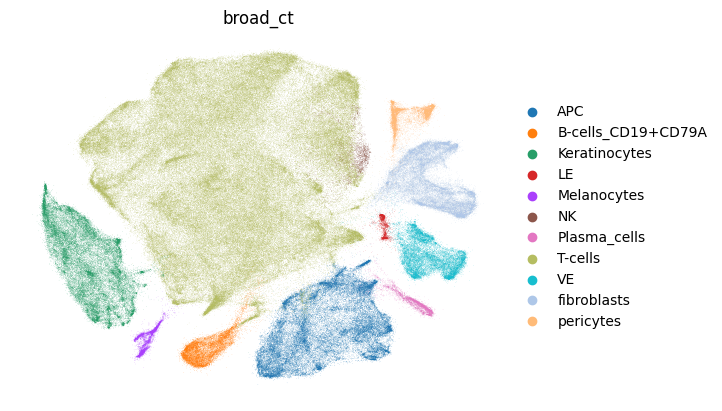

In [7]:
sc.pl.embedding(
    adata2,
    basis='X_scVI_MDE',
    color=["broad_ct"],
    frameon=False,
    ncols=1,
)

In [8]:
adata2.write_h5ad('/lustre/scratch126/cellgen/team298/ab72/CTCL/objects/8_CTCL+PRJ+HRA+flex_4k_5dim_100hidd_raw_flex_corrected_leiden_broad_ct.h5ad')